In [4]:
import os
import json

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
def load_json(filename):
    with open(filename) as fhand:
        return json.load(fhand)


def get_results_pressures(gas, fill):
    logs_dir = '../experiments'
    modes = [fill, f'cubic_{fill}', f'augmentation_cubic_{fill}', ]
    
    results = {m: {} for m in modes}
    for mode in results.keys():
    
        if gas == 'Hydrogen':
            pressures = [2, 100]
            T = 77
            units = 'g'
        else:
            pressures = [0.05, 0.5, 2.5]
            T = 298
            units = 'mol'
        
        for target in  [f'{gas}_1_{T}K_{P}bar_{units}' for P in pressures]:
            data = load_json(f'{logs_dir}/{mode}/{target}/None/results.json')['null']
            results[mode][target] = {}
            
            for metric in ['test_R2Score', 'test_MeanAbsoluteError']:
                results[mode][target][metric] = {}
                
                metric_values = [data[str(i)][0][metric] for i in range(3)]
                results[mode][target][metric]['mean'] = np.mean(metric_values)
                results[mode][target][metric]['std'] = np.std(metric_values)

    return results, pressures


pretty_labels = {
    'boltzmann': 'Grid over supercell',
    'cubic_boltzmann': 'Grid over cubic box',
    'augmentation_cubic_boltzmann': 'Grid over cubic box + aug.',
    'clip': 'Grid over supercell',
    'cubic_clip': 'Grid over cubic box',
    'augmentation_cubic_clip':  'Grid over cubic box + aug.',
    'zero_clip': 'Grid over supercell',
    'cubic_zero_clip': 'Grid over cubic box',
    'augmentation_cubic_zero_clip':  'Grid over cubic box + aug.',
    'test_R2Score': '$R^2$',
    'test_MeanAbsoluteError': 'MAE (uptake units)',
    'suptitle_boltzmann': 'Voxels filled with Boltzmann factor',
    'suptitle_clip': 'Voxels filled with clipped energy values in [-5000K, 5000K]',
    'suptitle_zero_clip': 'Voxels filled with clipped energy values in [-5000K, 0K]',
}

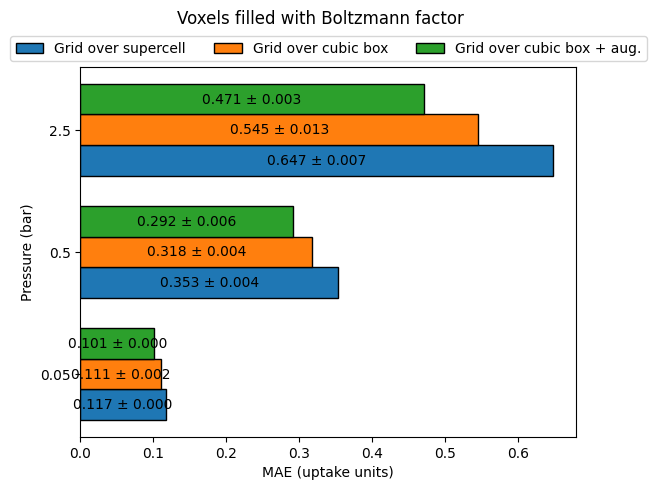

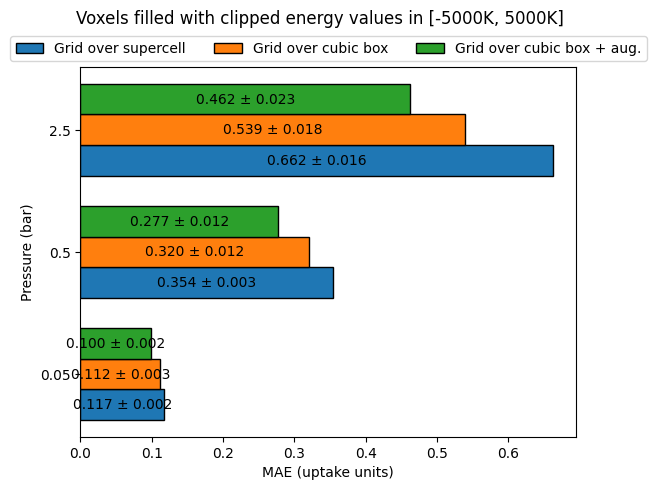

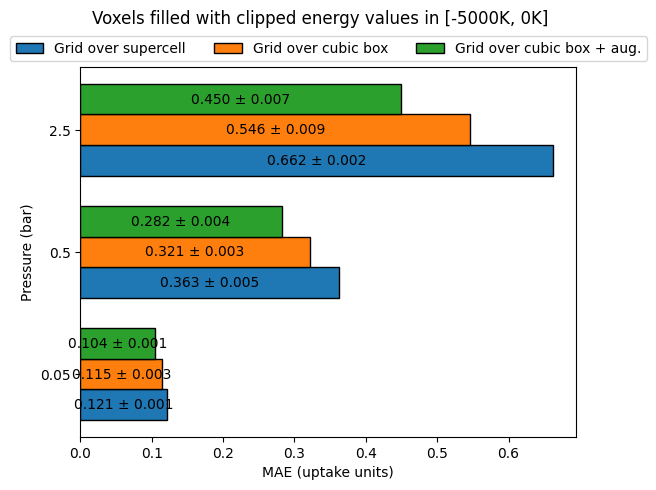

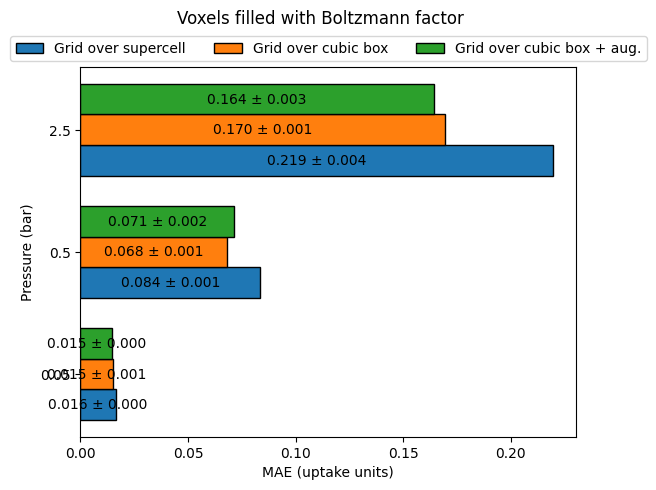

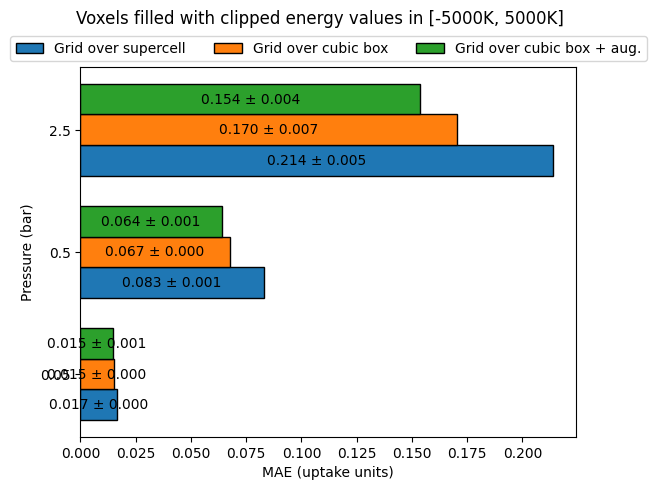

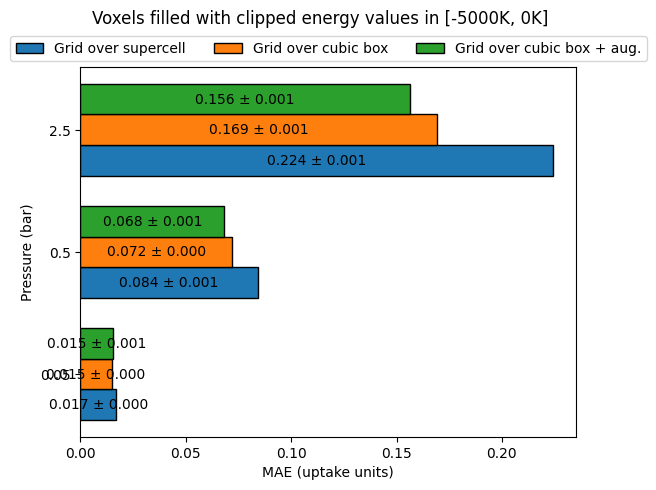

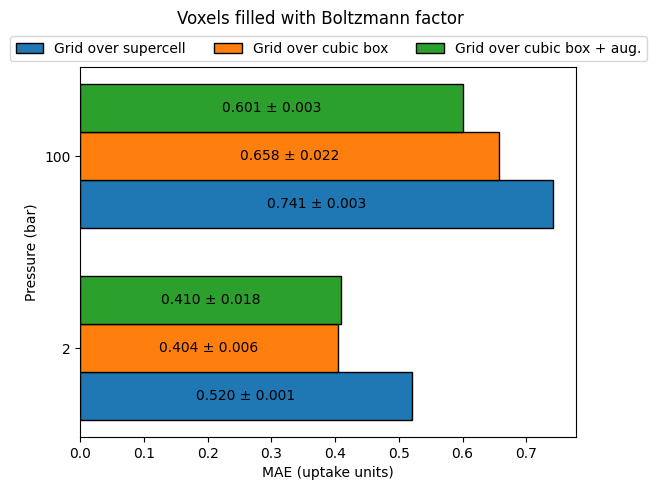

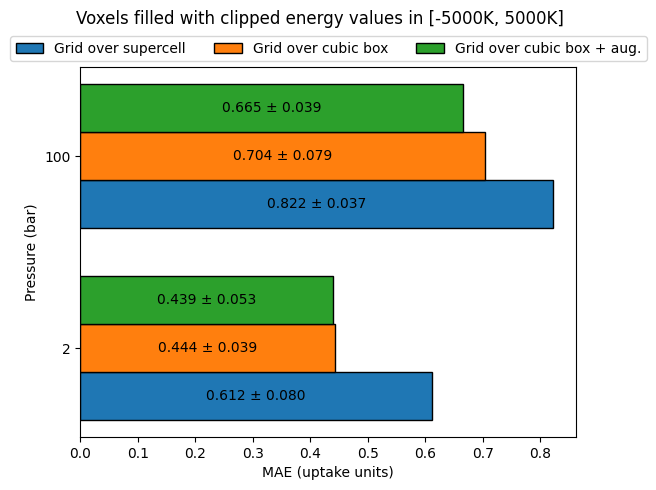

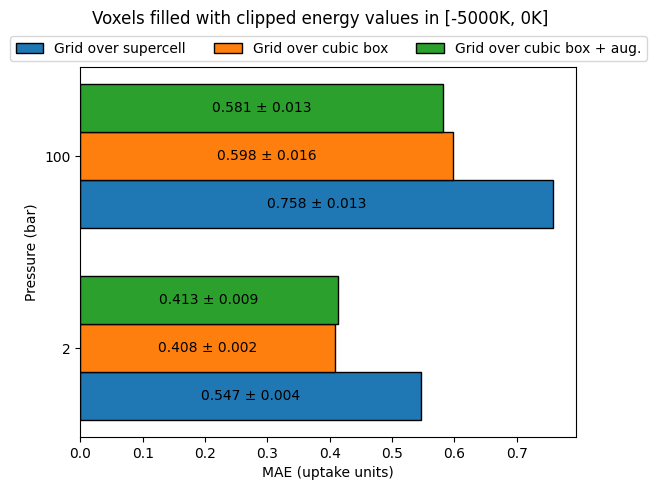

In [19]:
for gas in ['CarbonDioxide', 'Methane', 'Hydrogen']:
    for fill in ['boltzmann', 'clip', 'zero_clip']:
    #for fill in ['zero_clip']:
        for metric in ['test_MeanAbsoluteError']:
            results, pressures = get_results_pressures(gas, fill)
            
            fig, ax = plt.subplots()
            
            y = np.arange(len(pressures))
            height = 0.25
            multiplier = 0
            
            for mode in results.keys():
                mean = [results[mode][target][metric]['mean'] for target in results[mode].keys()]
                std = [results[mode][target][metric]['std'] for target in results[mode].keys()]
                labels = [f'{m:.3f} ± {s:.3f}' for m, s in zip(mean, std)]
            
                offset = height * multiplier
                rects = ax.barh(y + offset, mean, height, label=pretty_labels[mode], edgecolor='k', lw=1)
                #ax.bar_label(rects, labels=labels, label_type='center', color='white')
                ax.bar_label(rects, labels=labels, label_type='center', color='black')
                
                multiplier += 1
                
            ax.legend(loc='center', bbox_to_anchor=(0.5, 1.05), ncols=3)
            ax.set_xlim(right=1 if metric == 'test_R2Score' else None)
            ax.set_xlabel(pretty_labels[metric])
            ax.set_ylabel('Pressure (bar)')
            ax.set_yticks(y + height, pressures);
            
            fig.suptitle(pretty_labels[f'suptitle_{fill}'], y=1)
            #plt.savefig(f'figures/{gas}_{fill}_{metric}_benchmark.pdf')

### Tabulate results

In [13]:
for mode in results.keys():
    for target in results[mode].keys():
        print(mode, target)
        print(
            f'{results[mode][target]['test_MeanAbsoluteError']['mean']:.3f}'
            f' ± {results[mode][target]['test_MeanAbsoluteError']['std']:.3f}\n'
        )
    print('\n\n')

zero_clip CarbonDioxide_1_298K_0.05bar_mol
0.121 ± 0.001

zero_clip CarbonDioxide_1_298K_0.5bar_mol
0.363 ± 0.005

zero_clip CarbonDioxide_1_298K_2.5bar_mol
0.662 ± 0.002




cubic_zero_clip CarbonDioxide_1_298K_0.05bar_mol
0.115 ± 0.003

cubic_zero_clip CarbonDioxide_1_298K_0.5bar_mol
0.321 ± 0.003

cubic_zero_clip CarbonDioxide_1_298K_2.5bar_mol
0.546 ± 0.009




augmentation_cubic_zero_clip CarbonDioxide_1_298K_0.05bar_mol
0.104 ± 0.001

augmentation_cubic_zero_clip CarbonDioxide_1_298K_0.5bar_mol
0.282 ± 0.004

augmentation_cubic_zero_clip CarbonDioxide_1_298K_2.5bar_mol
0.450 ± 0.007




